In [1]:
import pandas as pd
import numpy as np
import json
import datetime

In [2]:
import os
os.getcwd()

'/home/alex/Solar-irradiance-Team08-IFT6759/Notebooks'

In [3]:
admin_config_path = "../train_cfg.json"
with open(admin_config_path, "r") as fd:
    admin_config = json.load(fd)

In [4]:
dataframe_path = admin_config['dataframe_path']
df = pd.read_pickle(dataframe_path)

In [5]:
df.replace(to_replace="nan", value=np.NaN, inplace=True)
df.head()

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.500000,0.0,0.0,night,-1.500000,0.0,0.0,night,-3.800000
2010-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.493333,0.0,0.0,night,-1.446667,0.0,0.0,night,-3.893333
2010-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.420000,0.0,0.0,night,-1.766667,0.0,0.0,night,-4.166667
2010-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.533333,0.0,0.0,night,-2.033333,0.0,0.0,night,-4.040000
2010-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.586667,0.0,0.0,night,-2.006667,0.0,0.0,night,-4.133333


In [6]:
station_id = "BND"
image_type = "hdf5_8bit"
daytime = df[station_id + "_DAYTIME"] == 1.0
valid_ghi = ~df[station_id + "_GHI"].isna()
valid_datetime = daytime & valid_ghi
df = df.loc[valid_datetime]

In [7]:
df["TBL_GHI"].head()

iso-datetime
2010-01-01 13:30:00   -3.673333
2010-01-01 13:45:00   -3.966667
2010-01-01 14:00:00   -3.946667
2010-01-01 14:15:00   -2.953333
2010-01-01 14:30:00    3.600000
Name: TBL_GHI, dtype: float64

In [8]:
cs = pd.melt(df,value_vars=['TBL_CLEARSKY_GHI','BND_CLEARSKY_GHI','TBL_CLEARSKY_GHI','DRA_CLEARSKY_GHI','FPK_CLEARSKY_GHI','GWN_CLEARSKY_GHI','PSU_CLEARSKY_GHI','SXF_CLEARSKY_GHI'],value_name="clearsky")
ghi = pd.melt(df,value_vars=['TBL_GHI','BND_GHI','TBL_GHI','DRA_GHI','FPK_GHI','GWN_GHI','PSU_GHI','SXF_GHI'],value_name="true")

In [9]:
cs

,variable,clearsky
0,TBL_CLEARSKY_GHI,0.000000
1,TBL_CLEARSKY_GHI,0.000000
2,TBL_CLEARSKY_GHI,0.000000
3,TBL_CLEARSKY_GHI,0.000000
4,TBL_CLEARSKY_GHI,0.642779
...,...,...
851075,SXF_CLEARSKY_GHI,145.234362
851076,SXF_CLEARSKY_GHI,110.951565
851077,SXF_CLEARSKY_GHI,76.842209
851078,SXF_CLEARSKY_GHI,44.828399


In [10]:
ghi

,variable,true
0,TBL_GHI,-3.673333
1,TBL_GHI,-3.966667
2,TBL_GHI,-3.946667
3,TBL_GHI,-2.953333
4,TBL_GHI,3.600000
...,...,...
851075,SXF_GHI,143.686667
851076,SXF_GHI,107.833333
851077,SXF_GHI,80.986667
851078,SXF_GHI,57.813333


In [11]:
together = pd.concat((cs,ghi),axis=1)
together = together[~together.true.isna()]

In [12]:
valid_ghis = together[together.clearsky>0]

In [13]:
valid_ghis.clearsky
valid_ghis.true

4           3.600000
5          12.753333
6          45.480000
7          85.786667
8         127.566667
             ...    
851075    143.686667
851076    107.833333
851077     80.986667
851078     57.813333
851079     36.046667
Name: true, Length: 783898, dtype: float64

In [14]:
v = valid_ghis.clearsky.to_numpy()
print(v.mean())
print(v.std())
print(v.max())
print(v.min())

486.83626230603187
285.45303397358606
1045.1129017993471
1.3916563138773755e-05


In [15]:
t = valid_ghis.true.to_numpy()
print(t.mean())
print(t.std())
print(t.max())
print(t.min())

384.0514077393157
293.30982182495467
1278.5533333333487
-24.760000000005597


In [16]:
valid_ghis.true.isna().sum()

0

In [18]:
import matplotlib.pyplot as plt

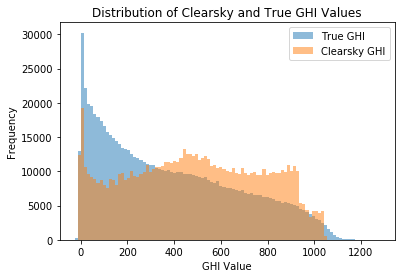

In [27]:
bins = np.linspace(t.min(),t.max(),100)

plt.hist(t, bins, alpha=0.5, label='True GHI')
plt.hist(v, bins, alpha=0.5, label='Clearsky GHI')
plt.title('Distribution of Clearsky and True GHI Values')
plt.xlabel("GHI Value")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.savefig("GHI Distributions.png")
plt.show()